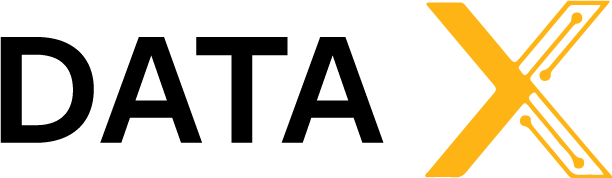

---
# Pandas Introduction 
### with Stock Data and Correlation Examples


**Author list:** Ikhlaq Sidhu & Alexander Fred Ojala

**References / Sources:** 
Includes examples from Wes McKinney and the 10 min intro to Pandas


**License Agreement:** Feel free to do whatever you want with this code

___

### Topics:
1. Dataframe creation
2. Reading data in DataFrames
3. Data Manipulation

## Import package

In [1]:
# pandas
import pandas as pd

In [2]:
# Extra packages
import numpy as np
import matplotlib.pyplot as plt # for plotting

# jupyter notebook magic to display plots in output
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6) # make the plots bigger

# Part 1: Creation of Pandas dataframes

**Key Points:** Main data types in Pandas:
* Series (similar to numpy arrays, but with index)
* DataFrames (table or spreadsheet with Series in the columns)




### We use `pd.DataFrame()` and can insert almost any data type as an argument

**Function:** `pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

Input data can be a numpy ndarray (structured or homogeneous), dictionary, or DataFrame. 


### 1.1 Create Dataframe using an array

In [3]:
# Try it with an array
np.random.seed(0) # set seed for reproducibility

a1 = np.random.randn(3)
a2 = np.random.randn(3)
a3 = np.random.randn(3)

print (a1)
print (a2)
print (a3)

[1.76405235 0.40015721 0.97873798]
[ 2.2408932   1.86755799 -0.97727788]
[ 0.95008842 -0.15135721 -0.10321885]


In [4]:
# Create our first DataFrame w/ an np.array - it becomes a column
df0 = pd.DataFrame(a1)
df0

,0
0,1.764052
1,0.400157
2,0.978738


In [5]:
print(df0) # difference when you print and output of the last row

          0
0  1.764052
1  0.400157
2  0.978738


In [6]:
# Check type
type(df0)

pandas.core.frame.DataFrame

In [7]:
# DataFrame from list of np.arrays

df0 = pd.DataFrame([a1, a2, a3])
df0

# notice that there is no column label, only integer values,
# and the index is set automatically

,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219


In [8]:
# We can set column and index names

df0 = pd.DataFrame([a1, a2, a3],columns=['a1','a2','a3'],index=['a','b','c'])
df0

,a1,a2,a3
a,1.764052,0.400157,0.978738
b,2.240893,1.867558,-0.977278
c,0.950088,-0.151357,-0.103219


In [10]:
# add  more columns to dataframe, like a dictionary, dimensions must match

df0['col4']=a2
df0

,a1,a2,a3,col4
a,1.764052,0.400157,0.978738,2.240893
b,2.240893,1.867558,-0.977278,1.867558
c,0.950088,-0.151357,-0.103219,-0.977278


In [12]:
# DataFrame from 2D np.array

np.random.seed(0)
array_2d = np.array(np.random.randn(9)).reshape(3,3)
array_2d

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885]])

In [14]:
df0 = pd.DataFrame(array_2d,columns=['rand_normal_1','Random Again','Third'] \
                   , index=[100,200,99]) 

df0

,rand_normal_1,Random Again,Third
100,1.764052,0.400157,0.978738
200,2.240893,1.867558,-0.977278
99,0.950088,-0.151357,-0.103219


### 1.2 Create Dataframe using an dictionary

In [15]:
# DataFrame from a Dictionary
dict1 = {'a1':a1, 'a2':a2,'a3':a3}
dict1

{'a1': array([1.76405235, 0.40015721, 0.97873798]),
 'a2': array([ 2.2408932 ,  1.86755799, -0.97727788]),
 'a3': array([ 0.95008842, -0.15135721, -0.10321885])}

In [17]:
df1 = pd.DataFrame(dict1,index=[1,2,3]) 
# note that we now have columns without assignment
df1

,a1,a2,a3
1,1.764052,2.240893,0.950088
2,0.400157,1.867558,-0.151357
3,0.978738,-0.977278,-0.103219


In [19]:
# We can add a list with strings and ints as a column 
df1['L'] = ["List", 3, "words"]
df1

,a1,a2,a3,L
1,1.764052,2.240893,0.950088,List
2,0.400157,1.867558,-0.151357,3
3,0.978738,-0.977278,-0.103219,words


### Pandas Series object
Every column is a Series. Like an np.array, but we can combine data types and it has its own index

In [21]:
type(df1['L'])

pandas.core.series.Series

In [22]:
df1['L'] # dtype object

1     List
2        3
3    words
Name: L, dtype: object

In [27]:
# different datatypes in a column
print(type(df1['L'][1]), type(df1['L'][2]))

<class 'str'> <class 'int'>


In [28]:
# Create a Series from a Python list
s = pd.Series([1,5,3]) # automatic index, 0,1,2...
s

0    1
1    5
2    3
dtype: int64

In [29]:
s2 = pd.Series([2, 3, 4], index = ['a','b','c']) #specific index
s2

a    2
b    3
c    4
dtype: int64

In [32]:
s2['a']

2

In [36]:
# We can add the Series s to the DataFrame above as column Series
# Remember to match indices
df1['Series'] = s
df1

,a1,a2,a3,L,Series
1,1.764052,2.240893,0.950088,List,5.0
2,0.400157,1.867558,-0.151357,3,3.0
3,0.978738,-0.977278,-0.103219,words,NaN


In [37]:
# We can also rename columns
df1 = df1.rename(columns = {'L':'RenamedL'})
df1

,a1,a2,a3,RenamedL,Series
1,1.764052,2.240893,0.950088,List,5.0
2,0.400157,1.867558,-0.151357,3,3.0
3,0.978738,-0.977278,-0.103219,words,NaN


In [38]:
# We can delete columns
del df1['RenamedL']
df1

,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0
3,0.978738,-0.977278,-0.103219,NaN


In [39]:
# or drop columns, see axis = 1
# does not change df1 if we don't set inplace=True
df1.drop('a2',axis=1) # returns a copy

,a1,a3,Series
1,1.764052,0.950088,5.0
2,0.400157,-0.151357,3.0
3,0.978738,-0.103219,NaN


In [40]:
df1

,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0
3,0.978738,-0.977278,-0.103219,NaN


In [41]:
# or drop rows
df1.drop(1,axis=0)

,a1,a2,a3,Series
2,0.400157,1.867558,-0.151357,3.0
3,0.978738,-0.977278,-0.103219,NaN


# 1.3 Indexing / Slicing a Pandas Dataframe

In [42]:
# Example: view only one column
df1['a1']

1    1.764052
2    0.400157
3    0.978738
Name: a1, dtype: float64

In [43]:
# Or view several column
df1[['a1','a3']]

,a1,a3
1,1.764052,0.950088
2,0.400157,-0.151357
3,0.978738,-0.103219


In [44]:
# slice of the DataFrame returned
# this slices the first three rows first followed by first 2 rows of the sliced frame
(df1[0:3][0:2])

,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0


In [45]:
# Lets print the five first 2  elements of column a1
# This is a new Series (like a new table)
df1['a1'][0:2]

1    1.764052
2    0.400157
Name: a1, dtype: float64

In [46]:
# Lets print the 2 column, and top 2 values- note the list of columns
df1[['a1','a3']][0:2]

,a1,a3
1,1.764052,0.950088
2,0.400157,-0.151357


## Instead of double indexing, we can use loc, iloc

##### loc gets rows (or columns) with particular labels from the index.
#### iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

## .iloc()

In [47]:
df1.iloc[0,0]

1.764052345967664

In [48]:


df1.iloc[0:2,0:2] # 2nd to 4th row, 4th to 5th column

,a1,a2
1,1.764052,2.240893
2,0.400157,1.867558


In [49]:
# iloc will also accept 2 'lists' of position numbers
df1.iloc[[0,2],[0,2]]

,a1,a3
1,1.764052,0.950088
3,0.978738,-0.103219


In [50]:
1# Data only from row with index value '1'
print (df1.iloc[1])
print()
print (df1.iloc[1,:])

a1        0.400157
a2        1.867558
a3       -0.151357
Series    3.000000
Name: 2, dtype: float64

a1        0.400157
a2        1.867558
a3       -0.151357
Series    3.000000
Name: 2, dtype: float64


## .loc()

In [51]:
# Usually we want to grab values by column names 

# Note: You have to know indices and columns
df1.loc[0:2,['a3','a2']]

,a3,a2
1,0.950088,2.240893
2,-0.151357,1.867558


In [52]:
#  Boolean indexing
# return  full rows where a2>0

df1[df1['a2']>0]

# df1['a2']>0 - checks condition ans returns boolean and gives 



,a1,a2,a3,Series
1,1.764052,2.240893,0.950088,5.0
2,0.400157,1.867558,-0.151357,3.0


In [53]:
# return column a3 values where a2 >0
df1['a3'][df1['a2']>0] 

1    0.950088
2   -0.151357
Name: a3, dtype: float64

In [54]:
# If you want the values in an np array
npg = df1.loc[:,"a2"].values #otherwise it returns a  indexed series
print(type(npg))
print()
npg

<class 'numpy.ndarray'>



array([ 2.2408932 ,  1.86755799, -0.97727788])

### More Basic Statistics

In [56]:
df1.describe()

,a1,a2,a3,Series
count,3.000000,3.000000,3.000000,2.000000
mean,1.047649,1.043724,0.231837,4.000000
std,0.684554,1.760165,0.622489,1.414214
min,0.400157,-0.977278,-0.151357,3.000000
25%,0.689448,0.445140,-0.127288,3.500000
50%,0.978738,1.867558,-0.103219,4.000000
75%,1.371395,2.054226,0.423435,4.500000
max,1.764052,2.240893,0.950088,5.000000


In [58]:
df1.describe().loc[['mean','std'],['a2','a3']]

,a2,a3
mean,1.043724,0.231837
std,1.760165,0.622489


In [59]:
# We can change the index sorting
df1.sort_index(axis=0, ascending=False).head() # starts a year ago

,a1,a2,a3,Series
3,0.978738,-0.977278,-0.103219,NaN
2,0.400157,1.867558,-0.151357,3.0
1,1.764052,2.240893,0.950088,5.0


#### For more functionalities check this notebook
https://github.com/ikhlaqsidhu/data-x/blob/master/02b-tools-pandas_intro-mplib_afo/legacy/10-minutes-to-pandas-w-data-x.ipynb



## Part 2: Reading data in pandas Dataframe


### Now, lets get some data in CSV format.

#### Description:
Aggregate data on applicants to graduate school at Berkeley for the six largest departments in 1973 classified by admission and sex.

https://vincentarelbundock.github.io/Rdatasets/doc/datasets/UCBAdmissions.html

In [60]:
df = pd.read_csv('data/ucbadmissions.csv')

In [61]:
# check statistics

In [62]:
df.columns

Index(['Admit', 'Gender', 'Dept', 'Freq'], dtype='object')

In [63]:
df.head()

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353


In [64]:
df.tail(2)

,Admit,Gender,Dept,Freq
22,Admitted,Female,F,24
23,Rejected,Female,F,317


In [66]:
df.groupby(['Admit','Gender']).sum()

Freq
Admit    Gender      
Admitted Female   557
         Male    1198
Rejected Female  1278
         Male    1493

In [67]:
df.describe()

,Freq
count,24.000000
mean,188.583333
std,140.063624
min,8.000000
25%,80.000000
50%,170.000000
75%,302.500000
max,512.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Admit   24 non-null     object
 1   Gender  24 non-null     object
 2   Dept    24 non-null     object
 3   Freq    24 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 896.0+ bytes


In [69]:
pd.unique(df['Dept'])

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

In [71]:
# Total number of applicants to Dept A
df[df['Dept']=='A']['Freq'].sum()

933

In [73]:
df.groupby('Dept').sum()

,Freq
Dept,
A,933
B,585
C,918
D,792
E,584
F,714


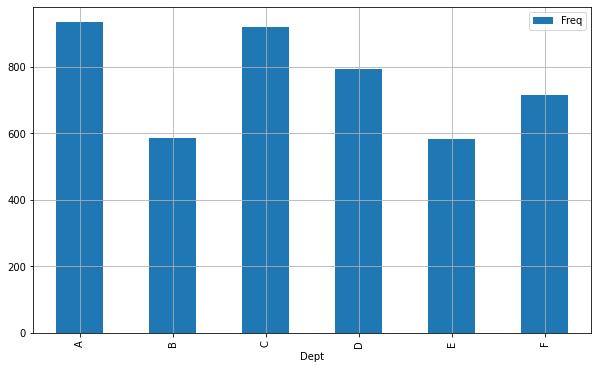

In [74]:
df.groupby('Dept').sum().plot.bar(grid=True)